# Challenge Deep Learning

L'objectif de ce challenge est de proposer une méthode de classification, basée sur des réseaux de neurones, permettant de classer des images issues de Google Quickdraw (https://quickdraw.withgoogle.com/data).
Le jeu de données proposé comprend 5 classes balancées, avec 15000 exemples d'apprentissage et 5000 exemples de validation : des paniers, des yeux, des lunettes, des lapins et des mains.

Vous pouvez utiliser tout algorithme qui vous semble pertinent (PMC, CNN,), en faisant varier les données d'entrée (normalisation, augmentation de données,...), les paramètres des réseaux considérés (fonction objectif, optimiseur, dropout, learning rate, taille des batchs...)

Bien sûr, pour valider votre travail, nous ferons tourner le code en local, sur la base originale que nous conservons, pour voir si les résultats que vous proposez sont reproductibles. 

Le compte-rendu sera effectué sur un notebook jupyter, dans lequel vous reporterez votre méthodologie en markdown, et vos codes en Python. Vous expliquerez votre démarche, justifierez vos choix, commenterez vos expérimentations et vos résultats.



# Notebook du challenge de Deep Learning réalisé par Jessem Ettaghouti, 3ème année F4. 

## Remarque importante : Il ne faut pas réexécuter le notebook depuis le début, sinon il faudra attendre la fin de l'exécution , qui prend au moins une journée (à cause du GridSearch à la fin du Notebook). 
## De cette façon, vous aurez accès aux traces et aux schémas (summary) des modèles et de leurs entrainements.
## Par contre, vous pouvez facilement exécuter le Notebook de test pour effectuer la classification de vos images.

Sources :

https://deeplylearning.fr/cours-pratiques-deep-learning/reconnaissance-dimages/

https://keras.io/api/

https://matplotlib.org/

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py



In [1]:
# Ceci permet d'installer les bibliothèques importantes pour pouvoir les importer. 
# C'est un bloc que vous pouvez réexécuter.
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Imports

In [2]:
import tensorflow
import pandas as pd
import numpy as np
import time
from PIL import Image
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# Ajouter les imports nécessaires

import os

#imports associés au AI
import keras
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Conv2D, Rescaling, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Données

#### On a rajouté l'option sample pour mélanger notre jeu de données.

In [3]:
classes = ["basket","eye","binoculars","rabbit","hand"]
train = pd.read_csv('data/train.csv').sample(frac=1, random_state=1).reset_index()
valid = pd.read_csv('data/valid.csv').sample(frac=1, random_state=1).reset_index()

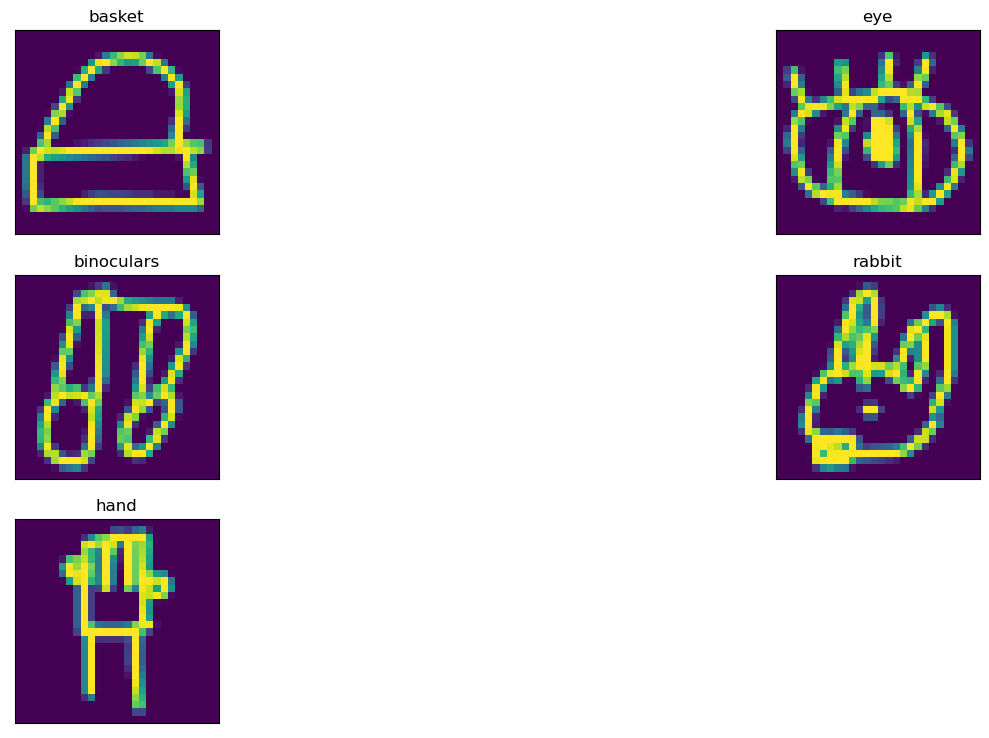

In [8]:
plt.figure(figsize=(18,9))
for i in range(0,5):
    ax= plt.subplot(3,2 ,i+1)
    mydata = pd.read_csv("data/train.csv",skiprows = [1], nrows=1)
    im = Image.open('data/images/'+classes[i]+'/'+ os.listdir("data/images/"+classes[i])[0])
    fig=ax.imshow(im)
    plt.title(classes[i])
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
plt.show()    


#### Préprocessing du jeu de données : 

Nous disposons d'un jeu de données de 100000 images divisées 75%/25%.

Nous allons simplement extraire les images et les mettres dans une grosse matrice. 

Pour les 75% d'entrainement, pas de modification vu qu'on les a déjà mélangés. 

Pour les 25%, on prendra 17500 images de validation et on laissera de côté 7500 images pour le test. (70%/30%)

Il sera important pour nous de tester notre modèle sur des images jamais rencontrées afin de voir s'il généralise bien et à quel point il peut être efficace.

##### Jeu de données d'entrainement : 



##### REMARQUE : Le préprocessing suivant a déjà été fait et est mis en commentaire pour ne pas répéter la même chose. Et pour simplifier l'importation des données. Il suffit d'exécuter le bloc load des matrices. 

In [16]:
"""
lx_train = []
ly_train = []
for i in range(len(train)):
    # Importer l'image
    im = Image.open("data/images/"+train["relative_path"].iloc[i])
    
    lx_train.append(np.asarray(im))
    ly_train.append(train.iloc[i]["class_label"])
X_train = np.array(lx_train) # jeu d'entrainement
y_train = to_categorical(np.array(ly_train)) # labelisation
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
"""


In [19]:
"""
lx_valid = []
ly_valid = []
for i in range(len(valid)):
    # Importer l'image
    im = Image.open("data/images/"+valid["relative_path"].iloc[i])  
    lx_valid.append(np.asarray(im))
    ly_valid.append(valid.iloc[i]["class_label"])
X_valid = np.array(lx_valid)
y_valid = to_categorical(np.array(ly_valid))
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2], 1)

# Diviser en 70/30 maintenant
X_val, X_test, y_val, y_test = train_test_split(X_valid, y_valid, test_size=0.3, stratify=y_valid)
"""

In [77]:
'''
np.save('X_train.npy',X_train)
np.save('y_train.npy',y_train)

np.save('X_val.npy',X_val)
np.save('y_val.npy',y_val)
np.save('X_test.npy',X_test)
np.save('y_test.npy',y_test)
'''

"\nnp.save('X_train.npy',X_train)\nnp.save('y_train.npy',y_train)\n\nnp.save('X_val.npy',X_val)\nnp.save('y_val.npy',y_val)\nnp.save('X_test.npy',X_test)\nnp.save('y_test.npy',y_test)\n"

In [75]:

X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")

X_val = np.load("X_val.npy")
y_val = np.load("y_val.npy")

X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")


## Liste des modèles testés

Les modèles utilisés sont tous des CNN, ils permettent d'extraire les features d'une image pour retenir ce qui est important et s'entraîner sur ce jeu de données d'images dessinées.

On a commencé par un modèle assez simple (model_0). Le modèle model_0 contient 2 blocs presque répétés constitués d'une couche de convolution et d'une couche Maxpooling.

- La couche de convolution permet de filtrer les features (caractéristiques) importantes de l'image 
- La couche Maxpooling réduit l'image en prenant pour chaque petit bloc matriciel son max. 

L dernier bloc applatit les données et les connecte pour qu'à la fin, il arrive à les mettre en 5 classes. Chaque classe prend une probabilité. Et celle qui est la plus probable est designée comme la classe choisie pour cette image.

Et ensuite, on a rajouté quelques couches pour augmenter la profondeur(model_1). C'est presque la même structure mais avec plus de couches de convolution afin de voir de mieux en mieux en profondeur.

Ensuite on a essayé de changer la structure du modèle et on a aussi rajouté des couches de dropout pour éviter au maximum le surapprentissage. 

On a aussi rajouté une couche BatchNormalization a la fin des dernières couches de convolution pour normaliser le jeu en fin de pré-traitement, car cela permet de stabiliser les données et faciliter l'apprentissage.


In [41]:
def model_0():
    # Modèle basique CNN 
    
    input_shape=(28,28,1)
    model = Sequential()
    
    # Ajout des couches
    
    # Couche input qui prend les images. Le Rescaling permet de remettre les images en intervalle [0;1]
    model.add(Input(input_shape))
    model.add(Rescaling(1./255, input_shape=input_shape))
    
    # Couche de convolution suivie d'un Maxpool pour réduire l'image.
    model.add(Conv2D(filters=32,kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Couche de convolution suivie d'un Maxpool pour réduire l'image.
    model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Couches connectées
    model.add(Flatten())
    model.add(Dense(units=256, activation='relu'))
    model.add(Dense(units=5, activation='softmax'))
    
    model.summary()
    model.compile(loss = 'binary_crossentropy', optimizer = "Adam", metrics = ['accuracy'])
    
    return(model)



def model_1():
    # On augmente la profondeur de notre jeu de données
    
    input_shape=(28,28,1)
    model = Sequential()
    
    # Ajout des couches
    
    # Couche input qui prend les images. Le Rescaling permet de remettre les images en intervalle [0;1]
    model.add(Input(input_shape))
    model.add(Rescaling(1./255, input_shape=input_shape))
    
    # Couche de convolution suivie d'un Maxpool pour réduire l'image.
    model.add(Conv2D(filters=32,kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Couche de convolution suivie d'un Maxpool pour réduire l'image.
    model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Couche de convolution suivie d'un Maxpool pour réduire l'image.
    model.add(Conv2D(filters=128,kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Couches connectées
    model.add(Flatten())
    model.add(Dense(units=256, activation='relu'))
    model.add(Dense(units=5, activation='softmax'))
    
    model.summary()
    model.compile(loss = 'binary_crossentropy', optimizer = "Adam", metrics = ['accuracy'])
    
    return(model)


def model_2():
    
    # On change la structure
    # On rajoute des couches dropout pour minimiser le surapprentissage
    # On rajoute la BatchNomalization à la fin.
    
    input_shape=(28,28,1)
    model = Sequential()
    model.add(Input(input_shape))
    model.add(Rescaling(1. / 255, input_shape=input_shape))
    
    model.add(Conv2D(32,(3,3),padding="same",activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))
    
   
    
    model.add(Conv2D(128,(3,3),padding="same",activation='relu'))
    model.add(Conv2D(256,(3,3),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))
    
    
    # Couches connectées
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=5, activation='softmax'))
    
    model.summary()   
    model.compile(loss = 'binary_crossentropy', optimizer = "Adam", metrics = ['accuracy'])
    
    
    return(model)

##### fonction qui entraine le modèle et retourne le modèle entraîné et l'history d'entraînement

In [1]:
def entrainer(model, patience=5, epochs=20):
    early_stop = EarlyStopping(monitor='val_accuracy', patience=patience)
    history = model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=epochs, callbacks=[early_stop])
    
    return(model,history)

##### fonction qui montre la courbe d'apprentissage_validation pour étudier le modèle.

In [26]:
def courbe_apprentissage(history):
    plt.figure(figsize = (8,8))
    plt.plot(history.history['accuracy'], label = "train accuracy",color = "black")
    plt.plot(history.history['val_accuracy'], label = "validation accuracy",color = "red")
    plt.title('Précision')
    plt.ylabel('Précision')
    plt.xlabel('epoch')
    plt.tight_layout()
    plt.legend()

## On montre les entraînements des différents modèles et on l'évalue sur le jeu de test à la fin.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

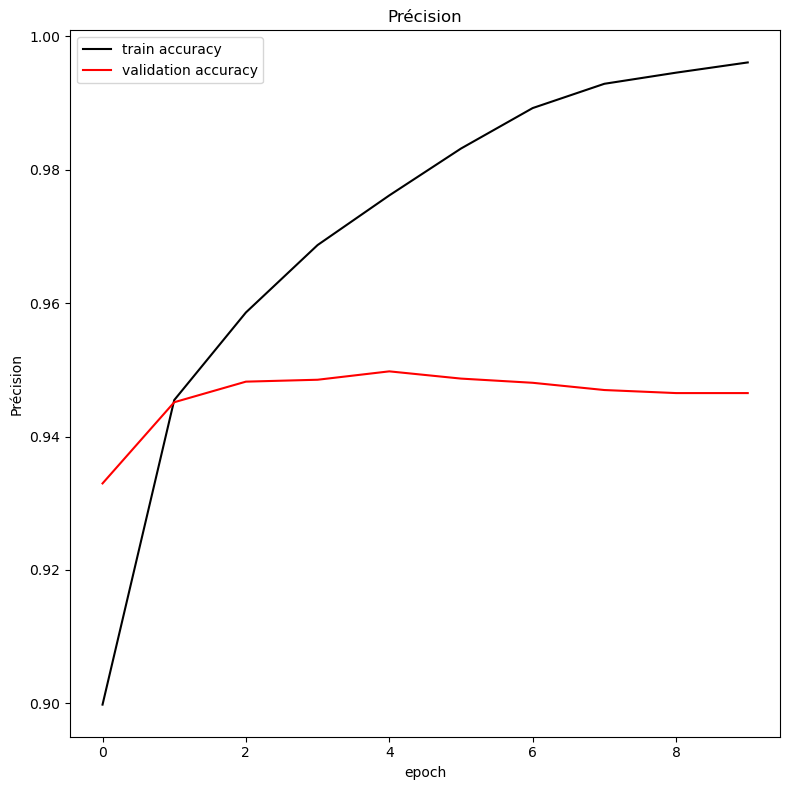

In [27]:
#----- Model_0 : 

model0 = model_0()
model0,history = entrainer(model0)
courbe_apprentissage(history)



In [63]:
loss_accuracy0 = model0.evaluate(X_test,y_test, batch_size=32)

235/235 [==============================] - 1s 4ms/step - loss: 0.0910 - accuracy: 0.9520


Pour model_0, on s'est aperçu qu'il a subit un surapprentissage. Cela se voit à partir de la 3ème epoque.
On s'est dit que le modèle n'avait pas assez de couches de convolution pour décrypter l'image, donc il l'a apprise par coeur.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 128)        

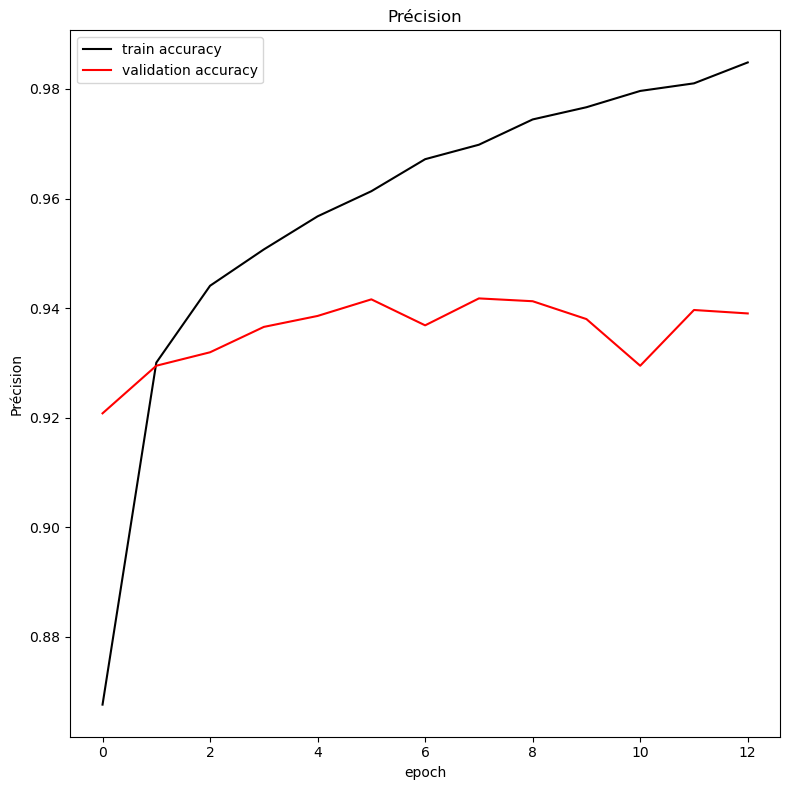

In [29]:
#----- Model_1 : 

model1 = model_1()
model1,history = entrainer(model1)
courbe_apprentissage(history)

In [64]:
loss_accuracy1= model1.evaluate(X_test,y_test, batch_size=32)

235/235 [==============================] - 1s 4ms/step - loss: 0.0832 - accuracy: 0.9455


Il y a un peu de progrès en terme de construction de modèles. Mais on a voulu changer un peu et on a rajouté les couches dropout pour essayer sur ce modèle2

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 128)       73856     
                                                      

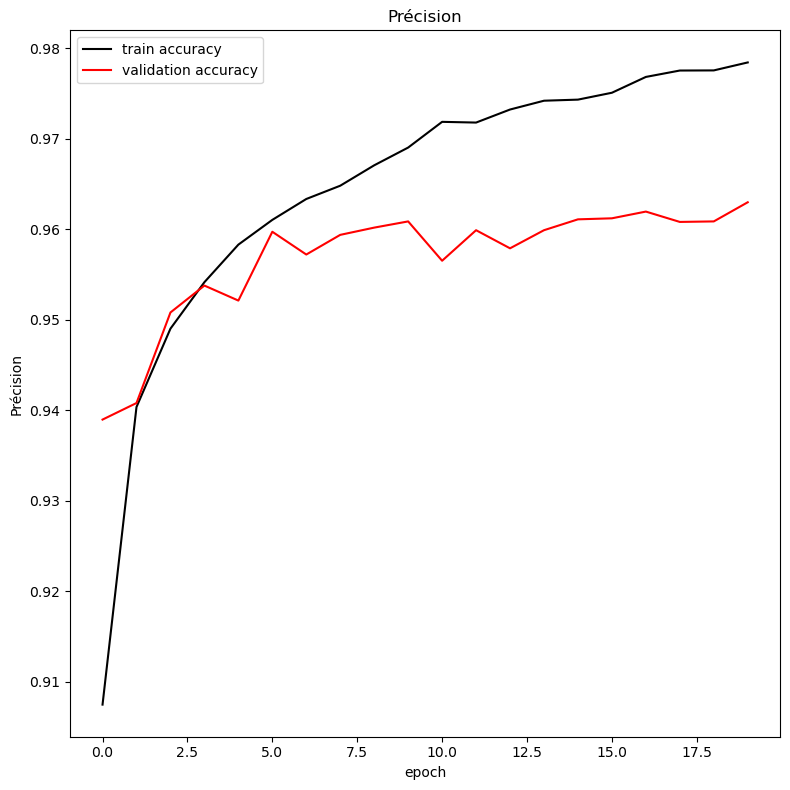

In [31]:
#----- Model_2 : 

model2 = model_2()
model2,history = entrainer(model2)
courbe_apprentissage(history)

In [65]:
loss_accuracy2= model2.evaluate(X_test,y_test, batch_size=32)

235/235 [==============================] - 7s 28ms/step - loss: 0.0578 - accuracy: 0.9660


On peut s'apercevoir que cette structure est bien bonne pour le moment. 

Pour améliorer un peu la performance du modèle, on peut effectuer une augmentation d'images. 

Elle demande des paramètres assez différents et donc elle génère de nouvelles images peu similaires permettant au modèle de mieux apprendre.

Donc, on fait un GridSearch avec différents hyperparamètres pour repérer les bons paramètres de l'augmentation d'images.

Il est important de faire un datagen.fit(X_train), de cette façon, le générateur génère des images avec des statistiques similaires à celles de l'entraînement de base. Si les statistiques générées sont différentes, cela va être néfaste pour le modèle.

La fonction est très longue à l'exécution, elle a duré à peu près une journée, vu que le nombre de paramètres du modèle est très élevé. Mais à la fin, elle a donné les hyperparamètres permettant d'avoir un max d'accuracy.

In [68]:
def GridSearch():    
    rotation_range = [15, 20]
    width_shift_range = [0.05, 0.1]
    height_shift_range = [0.05, 0.1]
    zoom_range = [0.05, 0.15]



    best_params = {}
    best_accuracy = 0

    

    for w in width_shift_range:
        for h in height_shift_range:
            for r in rotation_range:
                for z in zoom_range:
                    datagen = ImageDataGenerator(width_shift_range=w, height_shift_range=h,
                                              rotation_range=r, zoom_range=z,
                                              horizontal_flip=True)
                    # entrainer le generateur sur X_train
                    datagen.fit(X_train)
                    # Creer le modele
                    model = model_2()
                    # Entrainer le modele
                    model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),validation_data=datagen.flow(X_val,y_val,batch_size=32),
                                                steps_per_epoch=len(X_train) / 32, epochs=10)
                    # Evaluer
                    accuracy = model.evaluate(X_test, y_test)[1]
                    # Ajouter les parametres s'ils sont maximaux
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {'width_shift_range': w, 'height_shift_range': h,
                                               'rotation_range': r, 'zoom_range': z}
    return(best_params,best_accuracy)

In [71]:
best_params,best_accuracy = GridSearch()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 28, 28, 1)         0         
                                                                 
 conv2d_35 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_36 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 13, 13, 128)       73856     
                                                     

C:\Users\Jessem\AppData\Local\Temp\ipykernel_7344\1518715037.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),validation_data=datagen.flow(X_val,y_val,batch_size=32),


2343/2343 [==============================] - 227s 96ms/step - loss: 0.1182 - accuracy: 0.8911 - val_loss: 0.0674 - val_accuracy: 0.9334
Epoch 2/10
2343/2343 [==============================] - 221s 94ms/step - loss: 0.0759 - accuracy: 0.9301 - val_loss: 0.0638 - val_accuracy: 0.9390
Epoch 3/10
2343/2343 [==============================] - 236s 101ms/step - loss: 0.0662 - accuracy: 0.9384 - val_loss: 0.0566 - val_accuracy: 0.9432
Epoch 4/10
2343/2343 [==============================] - 218s 93ms/step - loss: 0.0609 - accuracy: 0.9425 - val_loss: 0.0560 - val_accuracy: 0.9460
Epoch 5/10
2343/2343 [==============================] - 216s 92ms/step - loss: 0.0585 - accuracy: 0.9451 - val_loss: 0.0529 - val_accuracy: 0.9503
Epoch 6/10
2343/2343 [==============================] - 245s 105ms/step - loss: 0.0551 - accuracy: 0.9476 - val_loss: 0.0496 - val_accuracy: 0.9493
Epoch 7/10
2343/2343 [==============================] - 238s 101ms/step - loss: 0.0541 - accuracy: 0.9497 - val_loss: 0.0526 - 

Epoch 2/10
2343/2343 [==============================] - 223s 95ms/step - loss: 0.0775 - accuracy: 0.9282 - val_loss: 0.0593 - val_accuracy: 0.9436
Epoch 3/10
2343/2343 [==============================] - 222s 95ms/step - loss: 0.0695 - accuracy: 0.9347 - val_loss: 0.0544 - val_accuracy: 0.9463
Epoch 4/10
2343/2343 [==============================] - 223s 95ms/step - loss: 0.0630 - accuracy: 0.9413 - val_loss: 0.0535 - val_accuracy: 0.9493
Epoch 5/10
2343/2343 [==============================] - 222s 95ms/step - loss: 0.0606 - accuracy: 0.9434 - val_loss: 0.0544 - val_accuracy: 0.9473
Epoch 6/10
2343/2343 [==============================] - 223s 95ms/step - loss: 0.0579 - accuracy: 0.9459 - val_loss: 0.0588 - val_accuracy: 0.9450
Epoch 7/10
2343/2343 [==============================] - 220s 94ms/step - loss: 0.0558 - accuracy: 0.9471 - val_loss: 0.0499 - val_accuracy: 0.9514
Epoch 8/10
2343/2343 [==============================] - 221s 94ms/step - loss: 0.0538 - accuracy: 0.9485 - val_loss: 0

Epoch 3/10
2343/2343 [==============================] - 215s 92ms/step - loss: 0.0699 - accuracy: 0.9346 - val_loss: 0.0650 - val_accuracy: 0.9366
Epoch 4/10
2343/2343 [==============================] - 216s 92ms/step - loss: 0.0634 - accuracy: 0.9409 - val_loss: 0.0558 - val_accuracy: 0.9487
Epoch 5/10
2343/2343 [==============================] - 218s 93ms/step - loss: 0.0606 - accuracy: 0.9425 - val_loss: 0.0545 - val_accuracy: 0.9464
Epoch 6/10
2343/2343 [==============================] - 217s 93ms/step - loss: 0.0580 - accuracy: 0.9458 - val_loss: 0.0521 - val_accuracy: 0.9503
Epoch 7/10
2343/2343 [==============================] - 218s 93ms/step - loss: 0.0568 - accuracy: 0.9473 - val_loss: 0.0508 - val_accuracy: 0.9522
Epoch 8/10
2343/2343 [==============================] - 220s 94ms/step - loss: 0.0540 - accuracy: 0.9495 - val_loss: 0.0463 - val_accuracy: 0.9557
Epoch 9/10
2343/2343 [==============================] - 220s 94ms/step - loss: 0.0522 - accuracy: 0.9514 - val_loss: 0

Epoch 4/10
2343/2343 [==============================] - 219s 93ms/step - loss: 0.0648 - accuracy: 0.9386 - val_loss: 0.0575 - val_accuracy: 0.9450
Epoch 5/10
2343/2343 [==============================] - 219s 94ms/step - loss: 0.0618 - accuracy: 0.9410 - val_loss: 0.0524 - val_accuracy: 0.9495
Epoch 6/10
2343/2343 [==============================] - 221s 94ms/step - loss: 0.0594 - accuracy: 0.9447 - val_loss: 0.0519 - val_accuracy: 0.9506
Epoch 7/10
2343/2343 [==============================] - 218s 93ms/step - loss: 0.0571 - accuracy: 0.9465 - val_loss: 0.0503 - val_accuracy: 0.9516
Epoch 8/10
2343/2343 [==============================] - 219s 93ms/step - loss: 0.0556 - accuracy: 0.9476 - val_loss: 0.0493 - val_accuracy: 0.9550
Epoch 9/10
2343/2343 [==============================] - 223s 95ms/step - loss: 0.0549 - accuracy: 0.9483 - val_loss: 0.0503 - val_accuracy: 0.9515
Epoch 10/10
235/235 [==============================] - 7s 29ms/step - loss: 0.0444 - accuracy: 0.9641
Model: "sequenti

Epoch 5/10
2343/2343 [==============================] - 360s 154ms/step - loss: 0.0615 - accuracy: 0.9422 - val_loss: 0.0556 - val_accuracy: 0.9477
Epoch 6/10
2343/2343 [==============================] - 356s 152ms/step - loss: 0.0573 - accuracy: 0.9458 - val_loss: 0.0535 - val_accuracy: 0.9514
Epoch 7/10
2343/2343 [==============================] - 368s 157ms/step - loss: 0.0558 - accuracy: 0.9469 - val_loss: 0.0504 - val_accuracy: 0.9516
Epoch 8/10
2343/2343 [==============================] - 860s 367ms/step - loss: 0.0536 - accuracy: 0.9501 - val_loss: 0.0495 - val_accuracy: 0.9511
Epoch 9/10
2343/2343 [==============================] - 220s 94ms/step - loss: 0.0528 - accuracy: 0.9505 - val_loss: 0.0491 - val_accuracy: 0.9527
Epoch 10/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0379 - accuracy: 0.9645
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 res

Epoch 6/10
2343/2343 [==============================] - 222s 95ms/step - loss: 0.0593 - accuracy: 0.9438 - val_loss: 0.0493 - val_accuracy: 0.9534
Epoch 7/10
2343/2343 [==============================] - 223s 95ms/step - loss: 0.0572 - accuracy: 0.9466 - val_loss: 0.0527 - val_accuracy: 0.9499
Epoch 8/10
2343/2343 [==============================] - 222s 95ms/step - loss: 0.0541 - accuracy: 0.9492 - val_loss: 0.0566 - val_accuracy: 0.9482
Epoch 9/10
2343/2343 [==============================] - 243s 104ms/step - loss: 0.0534 - accuracy: 0.9495 - val_loss: 0.0471 - val_accuracy: 0.9543
Epoch 10/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0628 - accuracy: 0.9540
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_21 (Rescaling)    (None, 28, 28, 1)         0         
                                                                 
 conv2d_79 (Conv2D)   

Epoch 7/10
2343/2343 [==============================] - 219s 93ms/step - loss: 0.0576 - accuracy: 0.9464 - val_loss: 0.0471 - val_accuracy: 0.9537
Epoch 8/10
2343/2343 [==============================] - 217s 93ms/step - loss: 0.0552 - accuracy: 0.9479 - val_loss: 0.0463 - val_accuracy: 0.9551
Epoch 9/10
2343/2343 [==============================] - 218s 93ms/step - loss: 0.0530 - accuracy: 0.9503 - val_loss: 0.0488 - val_accuracy: 0.9537
Epoch 10/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0380 - accuracy: 0.9651
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_23 (Rescaling)    (None, 28, 28, 1)         0         
                                                                 
 conv2d_87 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_88 (Conv2D)          (None, 26

Epoch 8/10
2343/2343 [==============================] - 238s 101ms/step - loss: 0.0569 - accuracy: 0.9458 - val_loss: 0.0527 - val_accuracy: 0.9514
Epoch 9/10
2343/2343 [==============================] - 244s 104ms/step - loss: 0.0565 - accuracy: 0.9479 - val_loss: 0.0492 - val_accuracy: 0.9530
Epoch 10/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0432 - accuracy: 0.9645
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_25 (Rescaling)    (None, 28, 28, 1)         0         
                                                                 
 conv2d_95 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_96 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 13, 13, 64)   

In [72]:
best_params,best_accuracy

({'width_shift_range': 0.1,
  'height_shift_range': 0.1,
  'rotation_range': 15,
  'zoom_range': 0.05},
 0.96506667137146)

Et maintenant, on utilise ces hyperparamètres pour créer à nouveau notre jeu d'images augmentées, initialiser notre modèle et l'entraîner sur encore plus d'epoques jusqu'à atteindre son pic en validation. 

In [73]:
w = best_params['width_shift_range'] 
h = best_params['height_shift_range'] 
r = best_params['rotation_range'] 
z = best_params['zoom_range']

datagen = ImageDataGenerator(width_shift_range=w, height_shift_range=h,
                             rotation_range=r, zoom_range=z,
                             horizontal_flip=True)

# entrainer le generateur sur X_train
datagen.fit(X_train)
# Creer le modele
model = model_2()
# Entrainer le modele

early_stop = EarlyStopping(monitor='val_accuracy', patience=5)


history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),validation_data=datagen.flow(X_val,y_val,batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=30, callbacks=[early_stop])

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_26 (Rescaling)    (None, 28, 28, 1)         0         
                                                                 
 conv2d_99 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_100 (Conv2D)         (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout_69 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_101 (Conv2D)         (None, 13, 13, 128)       73856     
                                                     

C:\Users\Jessem\AppData\Local\Temp\ipykernel_7344\4293964422.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),validation_data=datagen.flow(X_val,y_val,batch_size=32),


2343/2343 [==============================] - 236s 100ms/step - loss: 0.1285 - accuracy: 0.8789 - val_loss: 0.0943 - val_accuracy: 0.9155
Epoch 2/30
2343/2343 [==============================] - 277s 118ms/step - loss: 0.0806 - accuracy: 0.9258 - val_loss: 0.0642 - val_accuracy: 0.9367
Epoch 3/30
2343/2343 [==============================] - 242s 103ms/step - loss: 0.0712 - accuracy: 0.9336 - val_loss: 0.0607 - val_accuracy: 0.9442
Epoch 4/30
2343/2343 [==============================] - 268s 114ms/step - loss: 0.0651 - accuracy: 0.9395 - val_loss: 0.0520 - val_accuracy: 0.9485
Epoch 5/30
2343/2343 [==============================] - 274s 117ms/step - loss: 0.0627 - accuracy: 0.9405 - val_loss: 0.0615 - val_accuracy: 0.9459
Epoch 6/30
2343/2343 [==============================] - 269s 115ms/step - loss: 0.0593 - accuracy: 0.9449 - val_loss: 0.0507 - val_accuracy: 0.9510
Epoch 7/30
2343/2343 [==============================] - 258s 110ms/step - loss: 0.0567 - accuracy: 0.9468 - val_loss: 0.057

### On sauvegarde enfin notre modèle entrainé et les poids :

In [74]:
model.save_weights("weights.h5")
model.save("model_deep_learning02.h5")

# ---------------- FIN ( Voir Notebook "Notebook de Test" pour le test) -------------------